In [171]:
import math

# Part 1
## Task 1

In [172]:
def div3(n):
    """tests whether a number is divisble by 3"""
    test=n/3
    testint=float(int(test))
    print(f"test: {test}")
    print(f"testint: {testint}")
    if test==testint:
        print(f"{n} is divisible by 3")
    else:
        print(f"{n} is not divisible by 3")

In [173]:
div3(6)

test: 2.0
testint: 2.0
6 is divisible by 3


## Task 2

In [174]:
def fruit_test(f):
    """tests whether a certain fruit is acceptable"""
    fruits=["apple", "orange", "pear", "kiwi","strawberry"]
    if f in fruits:
        print(f"{f} is an acceptable fruit")
    else:
        print(f"{f} is not an acceptable fruit")


In [175]:
fruit_test("apple")
fruit_test("banana")

apple is an acceptable fruit
banana is not an acceptable fruit


## Task 3

In [176]:
from math import sin, cos, atan2 
def haversine_function(latlon1: list, latlon2: list):
    """"""
    r = 6371
    lat1, lon1 = latlon1
    lat2, lon2 = latlon2
    radlat1 = math.radians(lat1)
    radlon1 = math.radians(lon1)
    radlat2 = math.radians(lat2)
    radlon2 = math.radians(lon2)
    lat_dist = radlat2 - radlat1
    lon_dist = radlon2 - radlon1
    a=sin(lat_dist/2)**2+cos(radlat1)*cos(radlat2)*sin(lon_dist/2)**2
    c=2*atan2(math.sqrt(a),math.sqrt(1-a))
    d=r*c
    print(f"{d} km is the distance between the coordinates provided") 

In [177]:
coord1=[51.5072, 0.1276]
coord2=[55.9533, 3.1883]
haversine_function(coord1,coord2)

533.677916923906 km is the distance between the coordinates provided


# Part 2
## Question 1

In [178]:
import numpy as np
import pandas as pd
trees=pd.read_csv("data/portland_park_trees.csv")
q1=trees[trees.Genus.str.contains("Acer|Quercus")]
print(f"{len(q1.index)} trees are either Quercus or Acer")

5675 trees are either Quercus or Acer


## Question 2

In [179]:
q2=q1[q1.DBH.values>50]
print(f"{len(q2.index)} Quercus or Acer trees have a DBH of greater than 50 inches")

124 Quercus or Acer trees have a DBH of greater than 50 inches


## Question 3

In [180]:
Quercus_mean_DBH=trees[trees.Genus.str.contains("Quercus")].DBH.mean()
Acer_mean_DBH=trees[trees.Genus.str.contains("Acer")].DBH.mean()
Fraxinus_mean_DBH=trees[trees.Genus.str.contains("Fraxinus")].DBH.mean()
print(f"Quercus mean DBH: {Quercus_mean_DBH} inches")
print(f"Acer mean DBH: {Acer_mean_DBH} inches")
print(f"Fraxinus mean DBH: {Fraxinus_mean_DBH} inches")
print("Quercus trees have the highest mean DBH")

Quercus mean DBH: 23.56823839157492 inches
Acer mean DBH: 18.419085331846066 inches
Fraxinus mean DBH: 11.033609693877551 inches
Quercus trees have the highest mean DBH


## Question 4

In [181]:
q4=trees[trees.Genus.str.contains("Acer")].Genus_spec.unique()
print(f"{len(q4)} types of species in the Acer genus")

20 types of species in the Acer genus


In [182]:
cities=pd.read_csv("data/world_cities.csv")

In [183]:
cities["pop_M"]=cities["pop"]/1000000
cities=cities.drop("pop",axis=1)

In [184]:
# Creating a subset of cities that start with the same letter as my first name
Austin=cities[cities.city.str.startswith("Austin")]


In [185]:
# Using the first value in the cities subclass to find all cities in that country
USA_Cities=cities[cities.country.str.startswith(cities[cities.index==Austin.index[0]].country.values[0])]

In [186]:
# Returning the top 5 populated cities in USA
USA_Cities.sort_values("pop_M",ascending=False)[0:5]

,city,country,lat,lon,capital,pop_M
25877,New York,USA,40.67,-73.94,0,8.124427
21435,Los Angeles,USA,34.11,-118.41,0,3.911500
7366,Chicago,USA,41.84,-87.68,0,2.830144
14769,Houston,USA,29.77,-95.39,0,2.043005
28856,Phoenix,USA,33.54,-112.07,0,1.450884


# Part 3
## Graph 1

In [187]:
import matplotlib as mpl
import matplotlib.pyplot as plt

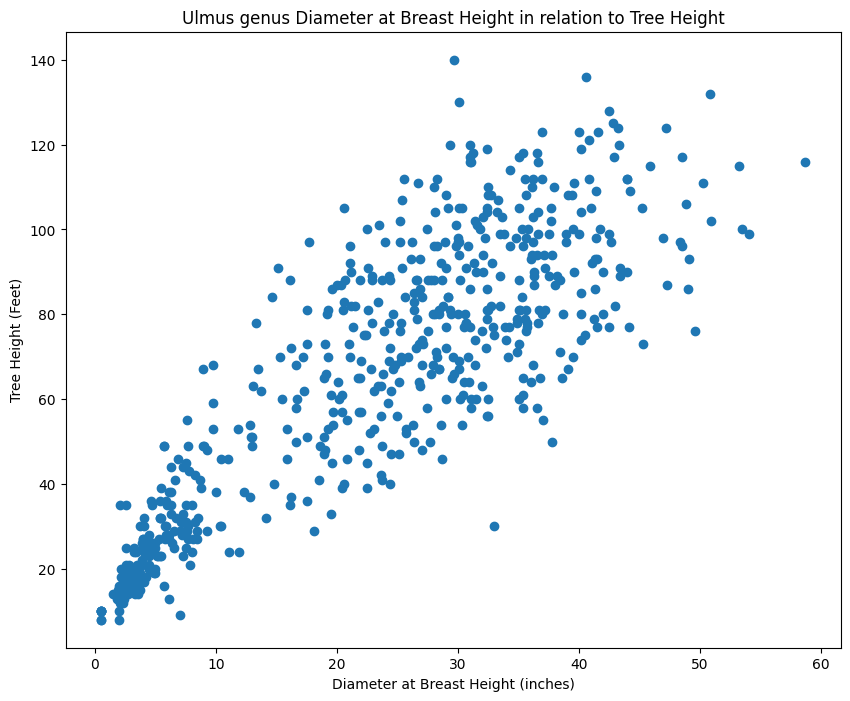

In [188]:
trees_ulmus=trees[trees.Genus.str.contains("Ulmus")]
fig, ax = plt.subplots(figsize=[10,8])
ax.set_xlabel("Diameter at Breast Height (inches)")
ax.set_ylabel("Tree Height (Feet)")
ax.set_title("Ulmus genus Diameter at Breast Height in relation to Tree Height")
ax.scatter(x=trees_ulmus.DBH,y=trees_ulmus.TreeHeight)

## Graph 2

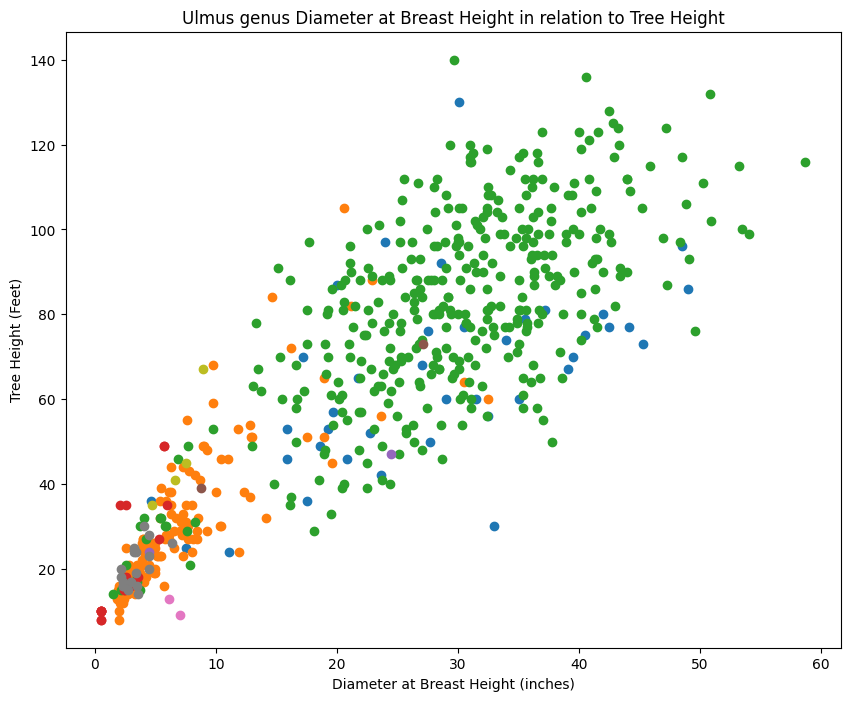

In [189]:
fig, ax = plt.subplots(figsize=[10,8])
ax.set_xlabel("Diameter at Breast Height (inches)")
ax.set_ylabel("Tree Height (Feet)")
ax.set_title("Ulmus genus Diameter at Breast Height in relation to Tree Height")
for s in trees_ulmus.Genus_spec.unique():
    Ulmus_specie=trees_ulmus[trees_ulmus.Genus_spec.str.contains(s)]
    ax.scatter(x=Ulmus_specie.DBH,y=Ulmus_specie.TreeHeight)

## Graph 3

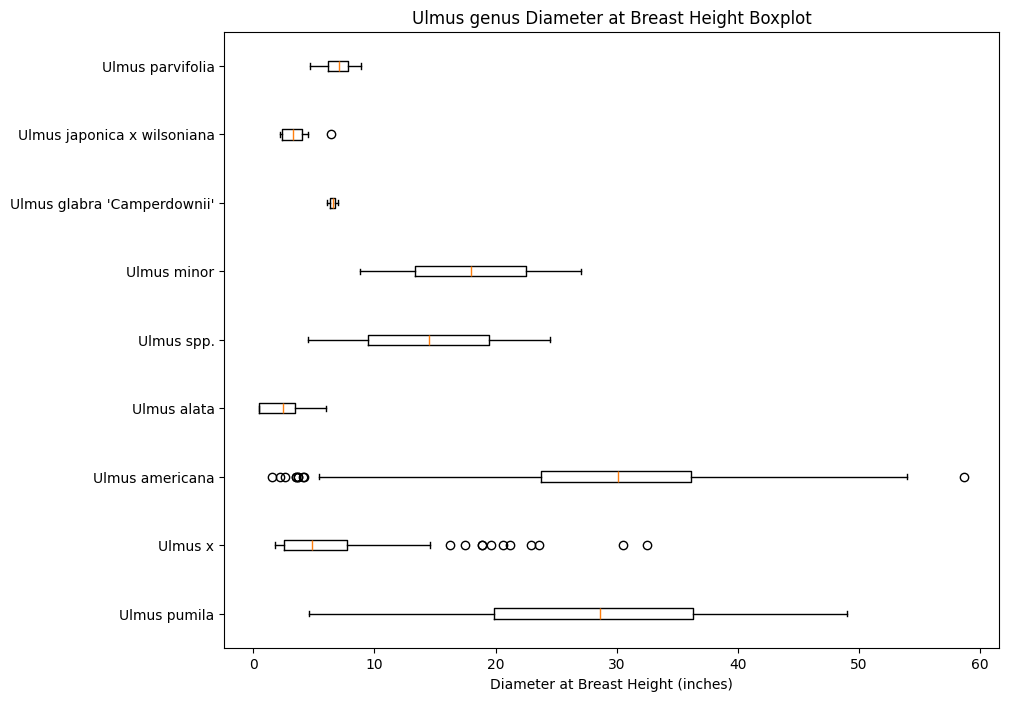

In [190]:
fig, ax = plt.subplots(figsize=[10,8])
ax.set_xlabel("Diameter at Breast Height (inches)")
ax.set_title("Ulmus genus Diameter at Breast Height Boxplot")
n=0
for s in trees_ulmus.Genus_spec.unique():
    Ulmus_specie=trees_ulmus[trees_ulmus.Genus_spec.str.contains(s)]
    ax.boxplot(x=Ulmus_specie.DBH,vert=False,labels={s},positions=[n])
    n+=1

## Graph 4

Text(0.5, 1.0, 'Ulmus genus Diameter at Breast Height Boxplot')

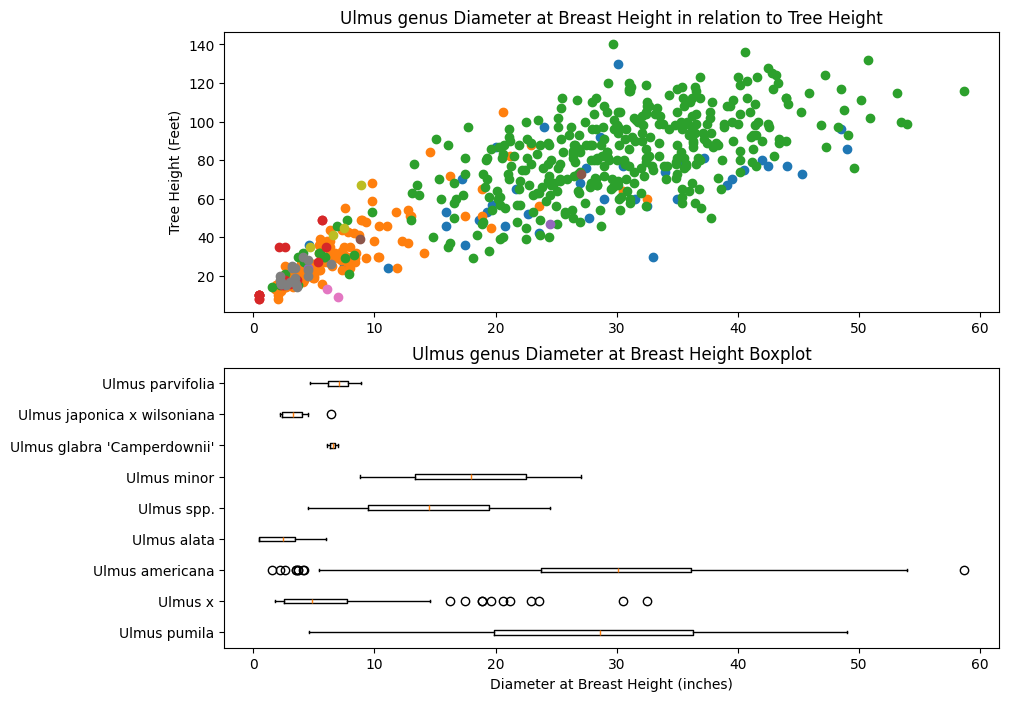

In [191]:
fig, axs = plt.subplots(2, figsize=[10,8])
n=0
for s in trees_ulmus.Genus_spec.unique():
    Ulmus_specie=trees_ulmus[trees_ulmus.Genus_spec.str.contains(s)]
    axs[0].scatter(x=Ulmus_specie.DBH,y=Ulmus_specie.TreeHeight)
    axs[1].boxplot(x=Ulmus_specie.DBH,vert=False,labels={s},positions=[n])
    n+=1
axs[1].set_xlabel("Diameter at Breast Height (inches)")
axs[0].set_ylabel("Tree Height (Feet)")
axs[0].set_title("Ulmus genus Diameter at Breast Height in relation to Tree Height")
axs[1].set_title("Ulmus genus Diameter at Breast Height Boxplot")

## Part 4

In [192]:
import geopandas

## Task 1

In [195]:
geopandas.read_file("/Users/andrewlee/work/lab2/data/WPA_SCOTLAND_SHP_27700")

,ID,LOCATION,STATUS,Shape_Leng,Shape_Area,geometry
0,0,Strathbogie,Current,91955.431252,3.472471e+08,"POLYGON ((355417.680 840421.636, 355253.135 84..."
1,0,Northern Strathspey,Current,72855.390194,2.057636e+08,"POLYGON ((302379.414 827792.332, 302413.124 82..."
2,0,Angus Glens,Current,104932.842125,3.745983e+08,"POLYGON ((328570.668 778977.907, 328649.883 77..."
3,0,Morvern,Current,131394.278163,4.869705e+08,"POLYGON ((167990.265 744922.079, 168210.752 74..."
4,0,Strathpeffer,Current,108043.651914,3.362617e+08,"POLYGON ((259703.930 866849.808, 259575.750 86..."
5,0,Strathavon,Historic,85378.423698,3.431863e+08,"POLYGON ((309695.395 821801.223, 309739.302 82..."


In [196]:
gdf = geopandas.read_file("/Users/andrewlee/work/lab2/data/WPA_SCOTLAND_SHP_27700")

## Task 2

Text(0.5, 1.0, 'First 5 Records')

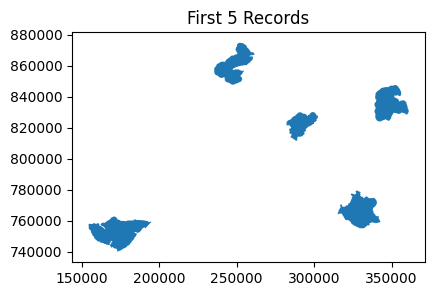

In [197]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
gdf.head(5).plot(ax=plt.gca())
plt.title('First 5 Records')

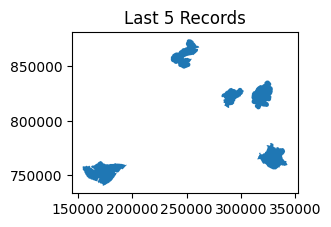

In [198]:
plt.subplot(1, 2, 2)
gdf.tail(5).plot(ax=plt.gca())
plt.title('Last 5 Records')

plt.show()

## Task 3

Text(0.5, 1.0, 'Wildcat Priority Areas for Conservation in the UK')

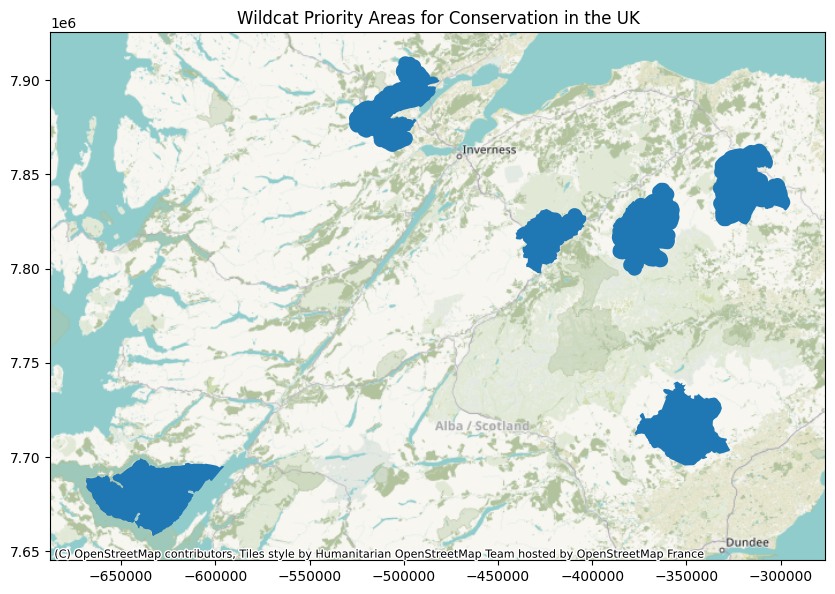

In [216]:
import contextily as cx
gdf=gdf.to_crs(epsg=3857)
ax=gdf.plot(figsize=(10,10))
cx.add_basemap(ax)
ax.set_title("Wildcat Priority Areas for Conservation in the UK")

In [210]:
import folium

In [ ]:
m=folium.Map()

## Task 4

In [199]:
crs = gdf.crs
print("Coordinate Reference System:", crs)

Coordinate Reference System: EPSG:27700


## Task 5

In [200]:
num_features = len(gdf)
print("Number of features:", num_features)

Number of features: 6


## Task 6

In [224]:
gdf_1=gdf[gdf.STATUS.str.contains("Current")]
gdf_1

,ID,LOCATION,STATUS,Shape_Leng,Shape_Area,geometry
0,0,Strathbogie,Current,91955.431252,3.472471e+08,"POLYGON ((-305522.682 7853048.312, -305828.921..."
1,0,Northern Strathspey,Current,72855.390194,2.057636e+08,"POLYGON ((-403316.384 7827905.942, -403245.466..."
2,0,Angus Glens,Current,104932.842125,3.745983e+08,"POLYGON ((-353350.816 7739019.747, -353205.263..."
3,0,Morvern,Current,131394.278163,4.869705e+08,"POLYGON ((-642897.594 7666441.899, -642487.410..."
4,0,Strathpeffer,Current,108043.651914,3.362617e+08,"POLYGON ((-484658.086 7898225.640, -484895.188..."


## Task 7

In [225]:
gdf_2=gdf_1[gdf_1.Shape_Area.values>3.4e+08]
gdf_2

,ID,LOCATION,STATUS,Shape_Leng,Shape_Area,geometry
0,0,Strathbogie,Current,91955.431252,3.472471e+08,"POLYGON ((-305522.682 7853048.312, -305828.921..."
2,0,Angus Glens,Current,104932.842125,3.745983e+08,"POLYGON ((-353350.816 7739019.747, -353205.263..."
3,0,Morvern,Current,131394.278163,4.869705e+08,"POLYGON ((-642897.594 7666441.899, -642487.410..."


## Task 8

Text(0.5, 1.0, 'Chloropleth Map of WildCat Conservation Areas based on Size')

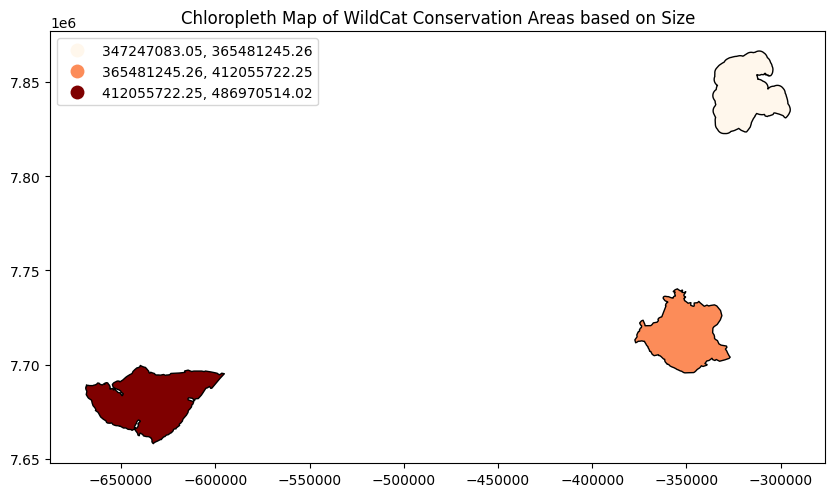

In [243]:
t8_plot=gdf_2.plot(column="Shape_Area",cmap="OrRd",edgecolor="k",figsize=[10,10],scheme="quantiles",k=3,legend=True, legend_kwds={"loc":"upper left"})
t8_plot.set_title("Chloropleth Map of WildCat Conservation Areas based on Size")

## Part 5

In [202]:
import rasterio
import earthpy

In [244]:
with rasterio.open("/Users/andrewlee/work/lab2/data/elev.tif") as dataset:
    print("Driver:", dataset.driver)
    print("Width:", dataset.width)
    print("Height:", dataset.height)
    print("Number of Bands:", dataset.count)
    print("Coordinate Reference System (CRS):", dataset.crs)
with rasterio.open("/Users/andrewlee/work/lab2/data/elev.tif") as dataset:
    bounds = dataset.bounds
    print("Min X:", bounds.left)
    print("Min Y:", bounds.bottom)
    print("Max X:", bounds.right)
    print("Max Y:", bounds.top)
   

Driver: GTiff
Width: 6303
Height: 5897
Number of Bands: 1
Coordinate Reference System (CRS): EPSG:32617
Min X: 479753.39945587853
Min Y: 4170823.2037591375
Max X: 668843.3994558785
Max Y: 4347733.203759138


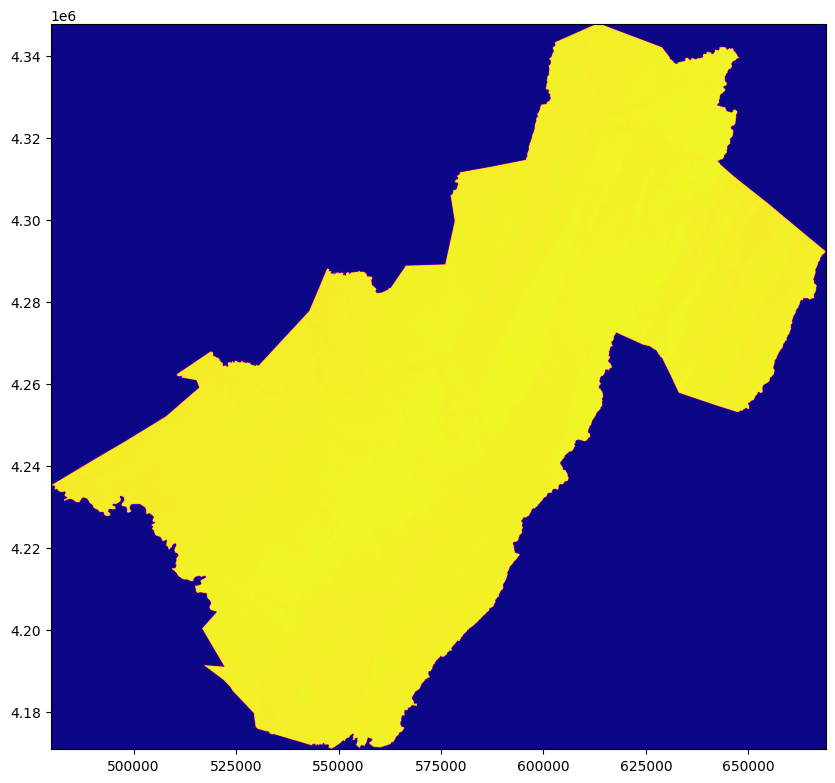

In [208]:
from rasterio.plot import show
with rasterio.open("/Users/andrewlee/work/lab2/data/elev.tif") as dataset:
    data = dataset.read(1)
    plt.figure(figsize=(10, 10))
    show(data, transform=dataset.transform, cmap='plasma')
    plt.show()